 # Loan Approval Analysis

## Problem Statement for Loan Approval Analysis

###### Introduction:

In the financial industry, predicting loan approval is a critical task for both applicants and lending institutions. This project aims to leverage various applicant information, such as loan amount, tenure, credit score, education, assets, and other variables, to predict whether a loan application is likely to be approved by the bank.

###### Objective:

The primary objective is to develop a predictive model that can analyze applicant information and determine the likelihood of loan approval. This model will provide valuable insights into the factors influencing loan approval decisions and enable the bank to prioritize services for customers with a higher probability of approval.

###### Challenges:

1.Feature Analysis:Identifying and analyzing the key features that significantly impact loan approval decisions.
2.Risk Assessment:Evaluating the risk associated with each loan application to make informed decisions.
3.Model Accuracy:Building a reliable predictive model that accurately classifies loan approval status based on the available features.

###### Requirements:

The analysis should encompass the following steps:

1.Data Preprocessing:Cleaning and preparing the dataset, handling missing values, and encoding categorical variables.

2.Exploratory Data Analysis (EDA):Gaining insights into the relationships between individual features and loan approval.

3.Feature Engineering:Selecting, transforming, or creating new features to enhance the predictive power of the model.

4.Model Selection:Choosing an appropriate classification algorithm based on the nature of the data and business requirements.

5.Model Training and Evaluation:Utilizing a portion of the dataset to train the classification model and evaluating its performance using appropriate metrics (e.g., accuracy, precision, recall).

6.Model Validation and Fine-tuning:Validating the model on a separate test set and fine-tuning hyperparameters to optimize performance.

###### Deliverables:
The organization expects the following:

1.Classification Model:A well-trained model capable of predicting loan approval status accurately.

2.Model Evaluation Report:Summarizing the performance metrics and demonstrating the model's effectiveness.

3.Feature Importance Analysis:Identifying the key features that have the most significant impact on loan approval.


By executing this analysis, the organization aims to streamline the loan approval process, improve efficiency, and provide enhanced services to customers who are more likely to have their loan applications approved.

## About the dataset
The loan approval dataset comprises financial records and pertinent information utilized in assessing the eligibility of individuals or organizations to secure loans from a lending institution. Key factors within the dataset include the Cibil score, income, employment status, loan term, loan amount, assets value, and loan status. Widely applied in machine learning and data analysis, this dataset serves as a foundation for constructing models and algorithms aimed at predicting the probability of loan approval based on the provided features.

## Data Dictionary


| Variable               | Description                                          |
|------------------------|------------------------------------------------------|
| loan_id                | Unique identifier for each loan                      |
| no_of_dependents       | Number of dependents of the applicant                |
| education              | Education level of the applicant                     |
| self_employed          | Whether the applicant is self-employed or not        |
| income_annum           | Annual income of the applicant                       |
| loan_amount            | Loan amount requested by the applicant               |
| loan_tenure            | Tenure of the loan requested by the applicant (in Years)|
| cibil_score            | CIBIL score of the applicant                         |
| residential_asset_value| Value of the residential asset of the applicant       |
| commercial_asset_value | Value of the commercial asset of the applicant        |
| luxury_asset_value     | Value of the luxury asset of the applicant            |
| bank_assets_value      | Value of the bank asset of the applicant              |
| loan_status            | Status of the loan (Approved/Rejected)               |

This data dictionary provides a detailed description of each variable in the loan approval dataset, specifying the unique loan ID, applicant details, financial information, and the outcome of the loan application (Approved or Rejected).

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Checking the shape of the dataset
df.shape

(4269, 13)

In [4]:
#checking all columns names in the dataset
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [5]:
#Removing the unnecessary load_id as it is an identifier column
df.drop(columns='loan_id', inplace=True)

In [6]:
# Checking for null/missing values
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
#checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB



The dataset comprises four types of assets: Residential, Commercial, Luxury, and Bank. These assets are being categorized into two groups: Movable and Immovable assets. Specifically, Residential and Commercial assets are classified as Immovable assets, while Luxury and Bank assets are categorized as Movable assets.

In [8]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

# Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']


In [9]:
# Drop columns
df=df.drop([' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value'],axis=1)

In [10]:
#Describe the dataset
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [11]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


## Exploratory Data Analysis

During the exploratory data analysis, I will examine the distribution of data across variables. Additionally, I will explore the relationships between independent and target variables, as well as assess the correlation among different variables. Through visualization, I aim to discern potential trends and patterns in the data, unveiling hidden insights that contribute to a better understanding of the dataset.

### Number of Dependents

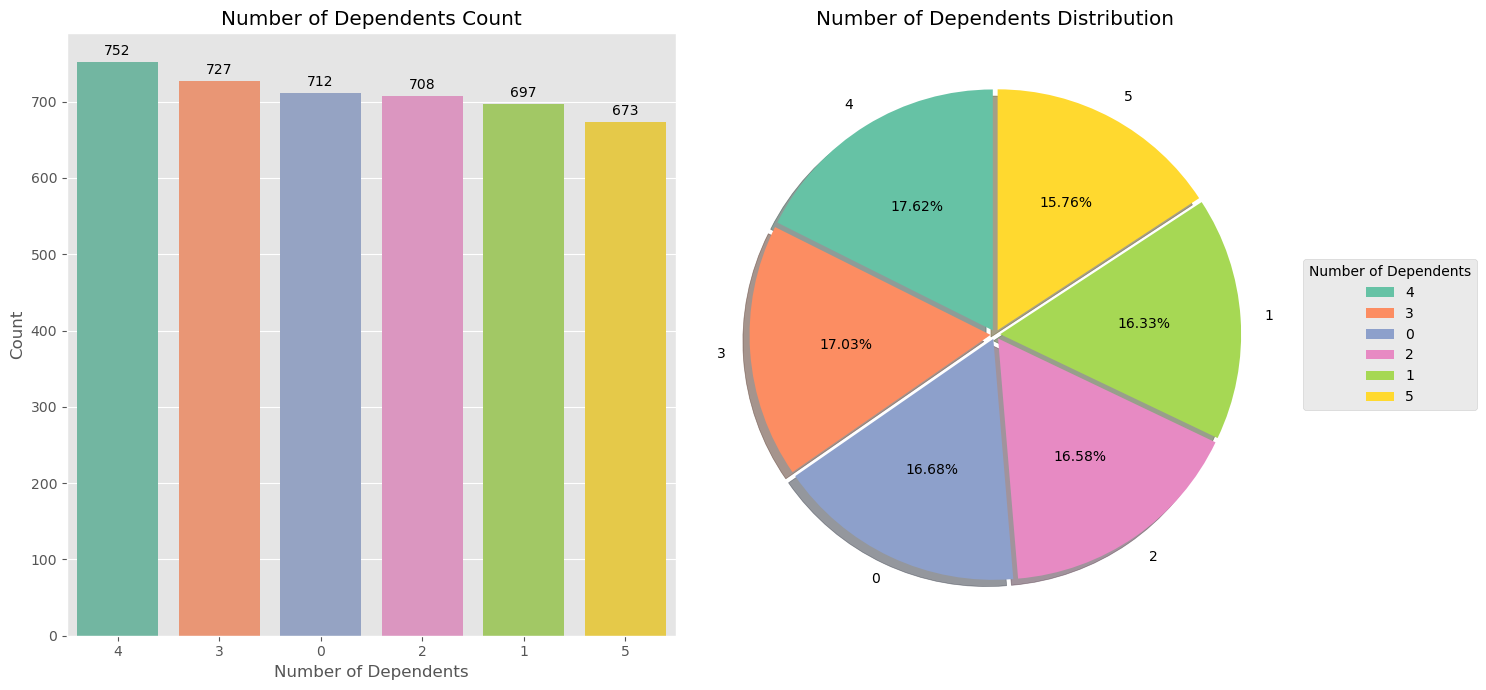

In [12]:
# Set plot style to 'ggplot'
plt.style.use('ggplot')

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Calculate the value counts of the "no_of_dependents" column
data = df[" no_of_dependents"].value_counts()

# Get the unique categories (labels) in the "no_of_dependents" column
labels = data.index.tolist()

# Generate a color palette
colors = sns.color_palette('Set2', n_colors=len(labels))

# Plot a countplot on the first subplot with advanced features
sns.countplot(x=" no_of_dependents", data=df, order=labels, palette=colors, ax=ax[0])
ax[0].set_title("Number of Dependents Count")
ax[0].set_xlabel("Number of Dependents")
ax[0].set_ylabel("Count")

# Add annotations on the countplot
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Plot a pie chart on the second subplot using the color palette with advanced features
wedges, texts, autotexts = ax[1].pie(x=data, labels=labels, colors=colors, autopct="%0.2f%%", explode=[0.02]*len(labels), shadow=True, startangle=90)

# Add annotations and legend on the pie chart
ax[1].legend(wedges, labels, title="Number of Dependents", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title("Number of Dependents Distribution")

# Adjust layout for better visualization
plt.tight_layout()

# Display the figure
plt.show()


### Interpretation: 
This graph illustrates the count of dependents for loan applicants, revealing a relatively consistent distribution across different dependent categories. However, a notable observation is the higher representation of applicants with 4 and 3 dependents compared to other categories. As the number of dependents increases, it is apparent that the disposable income of the applicants tends to decrease. Consequently, I infer that applicants with 0 or 1 dependent stand a better chance of loan approval, given the potential for a higher disposable income in these cases. This assumption is grounded in the understanding that fewer dependents often correlate with a more favorable financial situation for loan eligibility.

### Education and Income

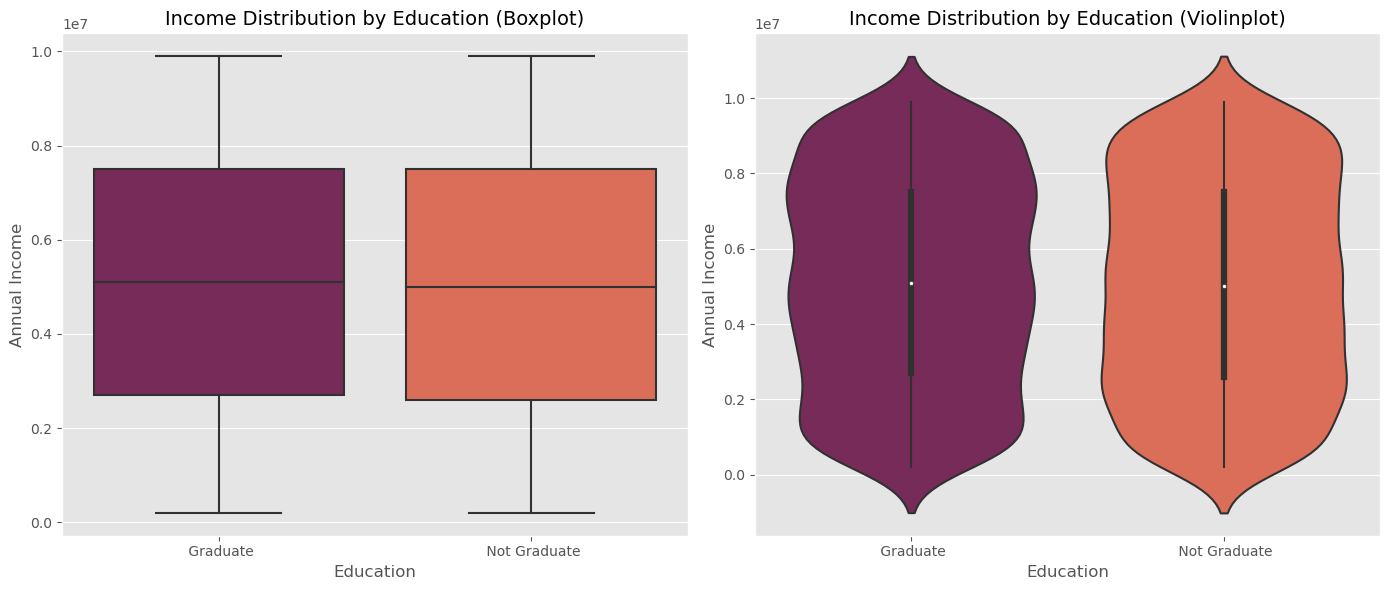

In [13]:
# Create a figure and axes with specified size
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Create a boxplot and violinplot using seaborn
sns.boxplot(x=' education', y=' income_annum', data=df, ax=ax[0], palette="rocket")
sns.violinplot(x=' education', y=' income_annum', data=df, ax=ax[1], palette="rocket")

# Set titles for the subplots
ax[0].set_title('Income Distribution by Education (Boxplot)', fontsize=14)
ax[1].set_title('Income Distribution by Education (Violinplot)', fontsize=14)

# Set labels for the axes
for axis in ax:
    axis.set_xlabel('Education', fontsize=12)
    axis.set_ylabel('Annual Income', fontsize=12)

# Customize the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:
The boxplot and violinplot present a visual exploration of the relationship between applicants' education levels and their annual income. The boxplot reveals an intriguing observation: both graduates and non-graduates exhibit nearly identical median incomes, with only a marginal increase in the income of graduates. Conversely, the violinplot offers a more detailed perspective on income distribution among these two groups. Notably, non-graduate applicants display a relatively even income distribution spanning from 2,000,000 to 8,000,000, while graduates exhibit a more uneven distribution, with a higher concentration of applicants earning between 6,000,000 and 8,000,000. Given the limited disparity in annual income between graduates and non-graduates, it is tentatively suggested that education may not be a decisive factor in the loan approval process.

## Employment Status and Education

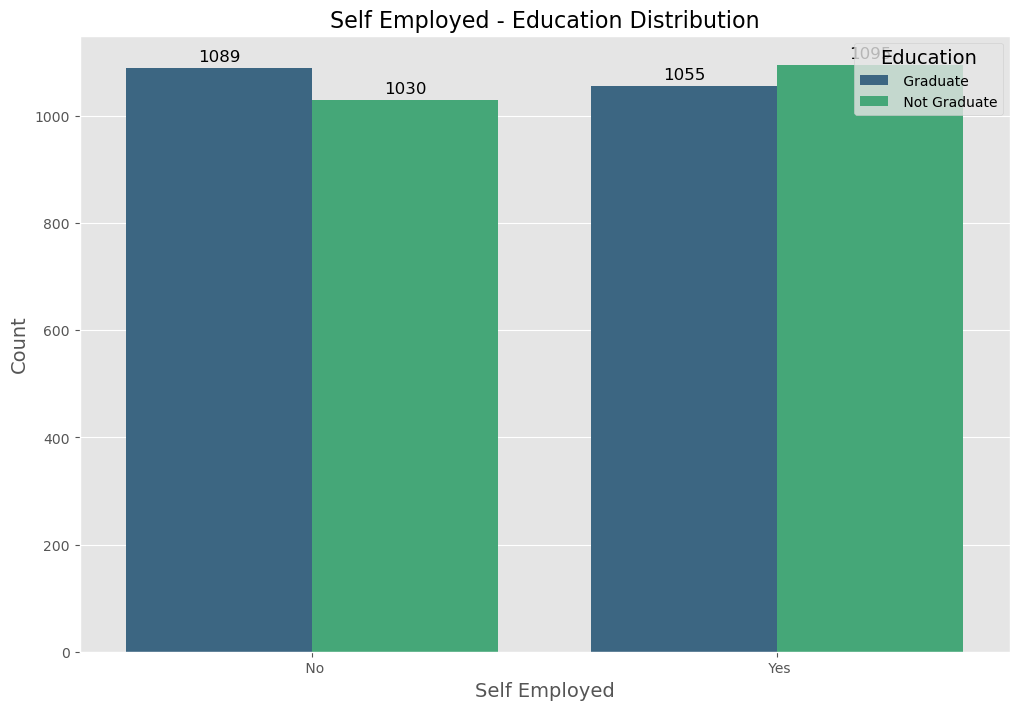

In [14]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 8))

# Create a countplot using seaborn with a custom color palette
palette = "viridis"  # You can choose a different palette
sns.countplot(x=" self_employed", hue=" education", data=df, palette=palette, ax=ax)

# Set the title for the subplot
ax.set_title("Self Employed - Education Distribution", fontsize=16)

# Customize labels and legend
ax.set_xlabel("Self Employed", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.legend(title="Education", title_fontsize='14', loc="upper right")

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


### Interpretation:
This visualization illustrates the distribution of self-employed applicants categorized by their education level. Notably, a substantial proportion of graduate applicants are observed to be non-self-employed, while a significant majority of non-graduates are self-employed. This dichotomy suggests that graduates are more inclined towards salaried employment, whereas non-graduates are more likely to pursue self-employment opportunities. This distinction in employment types could potentially impact loan approval decisions, as salaried employees typically possess a more stable income, enhancing the likelihood of timely loan repayment. However, it is crucial to acknowledge the alternative scenario where self-employed applicants might have higher incomes, potentially influencing their capacity to repay the loan. Considering these nuances becomes imperative when predicting loan approval outcomes.

## Loan Amount and Tenure

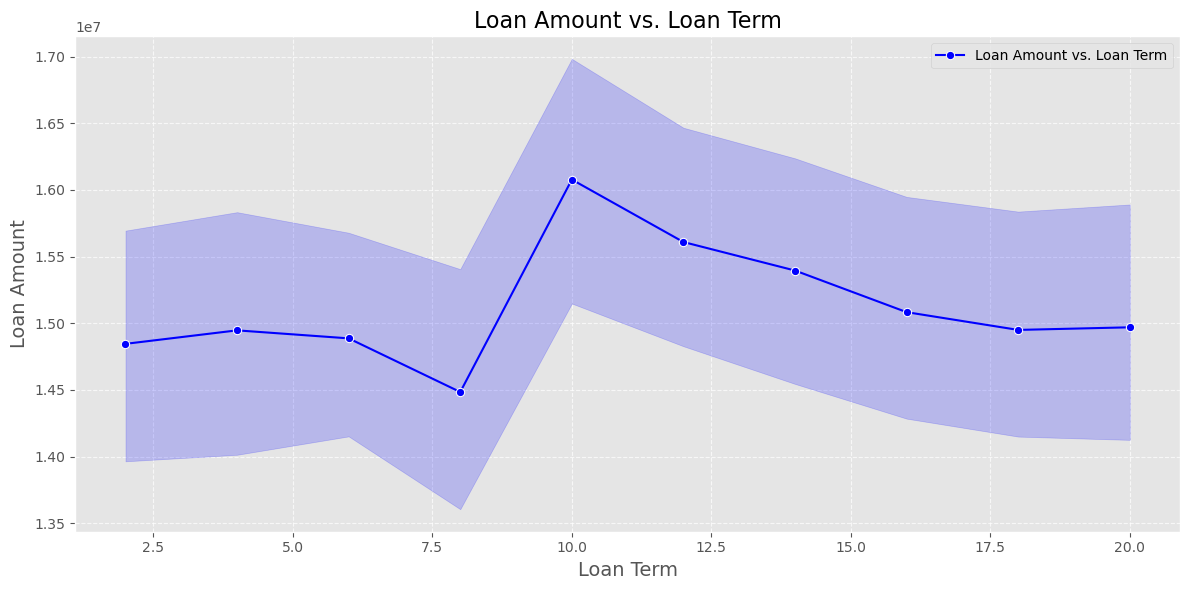

In [15]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line plot using seaborn
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, marker='o', color='blue', ax=ax, label='Loan Amount vs. Loan Term')

# Set title and labels for the plot
ax.set_title('Loan Amount vs. Loan Term', fontsize=16)
ax.set_xlabel('Loan Term', fontsize=14)
ax.set_ylabel('Loan Amount', fontsize=14)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Customize legend
ax.legend()

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:
This line plot illustrates the relationship between loan amount and loan tenure. Notably, the loan amount remains relatively consistent, ranging from 1,400,000 to 1,550,000, for loan tenures between 2.5 and 7.5 years. However, a notable deviation is observed for a loan tenure of 10 years, where the loan amount significantly increases. This suggests a distinct pattern in the loan amount, particularly emphasizing a substantial rise for the 10-year loan tenure.

## CIBIL Score Distribution

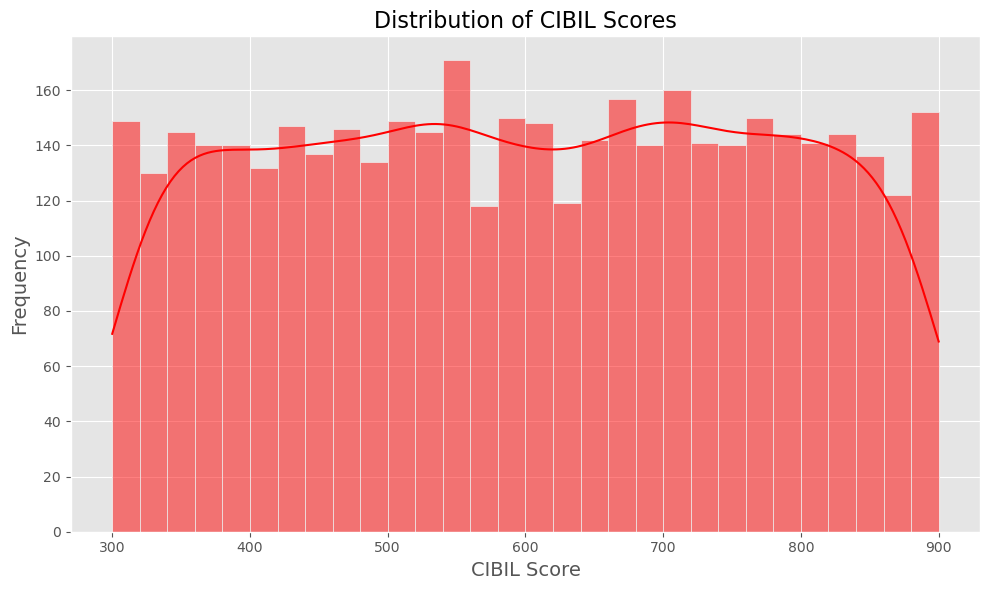

In [16]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a histogram using seaborn without cumulative distribution line
sns.histplot(df[' cibil_score'], bins=30, kde=True, color='red', ax=ax)

# Set title and labels for the plot
ax.set_title('Distribution of CIBIL Scores', fontsize=16)
ax.set_xlabel('CIBIL Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:
Before looking into the analysis of CIBIL scores, it's essential to understand the significance of different score ranges:

CIBIL Score Meaning: 

|CIBIL Score Range|Description |
|-----------------|------------|
|300-549| Poor |
|550-649| Fair |
|650-749| Good |
|750-799| Very Good |
|800-900| Excellent |


(Source:https://www.godigit.com/finance/credit-score/how-to-check-credit-score)

Referencing this table, a substantial portion of customers exhibits CIBIL scores below 649, indicating a potential impact on their loan applications. However, there exists a noteworthy number of applicants with scores above 649, which is promising for the bank. Identifying these customers provides an opportunity for the bank to offer priority services, special incentives, and exclusive discounts, potentially attracting them to choose the bank for their loan needs. This observation leads to a hypothesis that customers with CIBIL scores surpassing 649 are more likely to have their loan applications approved.

## Asset Distribution

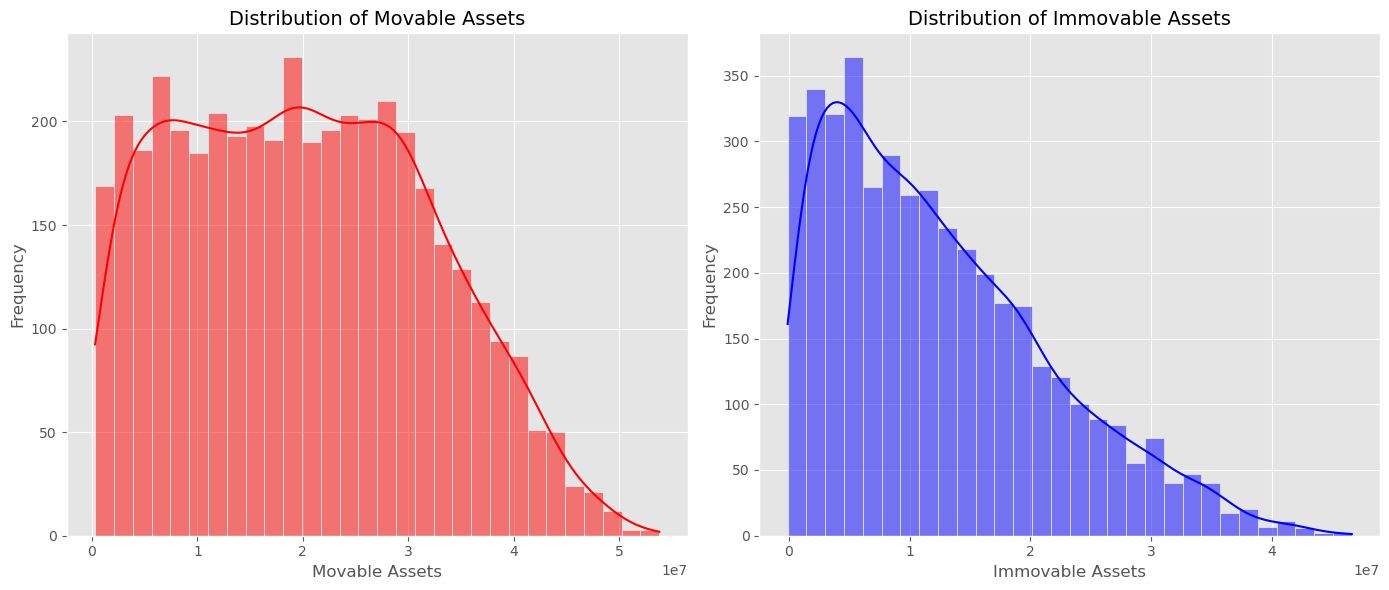

In [17]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Create histograms using seaborn with advanced features
sns.histplot(df['Movable_assets'], ax=ax[0], color='red', bins=30, kde=True)       # (KDE)-use for smoother visualization
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue', bins=30, kde=True)

# Set titles and labels for the plots
ax[0].set_title('Distribution of Movable Assets', fontsize=14)
ax[0].set_xlabel('Movable Assets', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

ax[1].set_title('Distribution of Immovable Assets', fontsize=14)
ax[1].set_xlabel('Immovable Assets', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

# Customize layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


### Interpretation:
Assets play a pivotal role in the loan application process as they provide a form of security for the bank, ensuring the borrower's commitment to loan repayment. As previously mentioned, assets are categorized into movable and immovable, with the above graphs illustrating their distribution in the dataset.

For movable assets, encompassing bank assets and luxury assets, a predominant number of applicants possess assets valued at less than 30 million. There is a discernible trend indicating a gradual decrease in the number of applicants as the value of movable assets increases. Turning attention to immovable assets, comprising residential and commercial assets, a significant majority of applicants have assets valued below 15 million. Notably, there is a pronounced trend showcasing a substantial reduction in the number of applicants as the value of immovable assets surpasses 20 million.

Having explored the data distribution and established assumptions and hypotheses during the Exploratory Data Analysis (EDA) phase, the next step involves visualizing the relationship between independent variables and the target variable. This visualization aims to substantiate or refute the formulated assumptions and hypotheses, providing valuable insights into the factors influencing loan approval.

## Number of Dependants Vs Loan Status

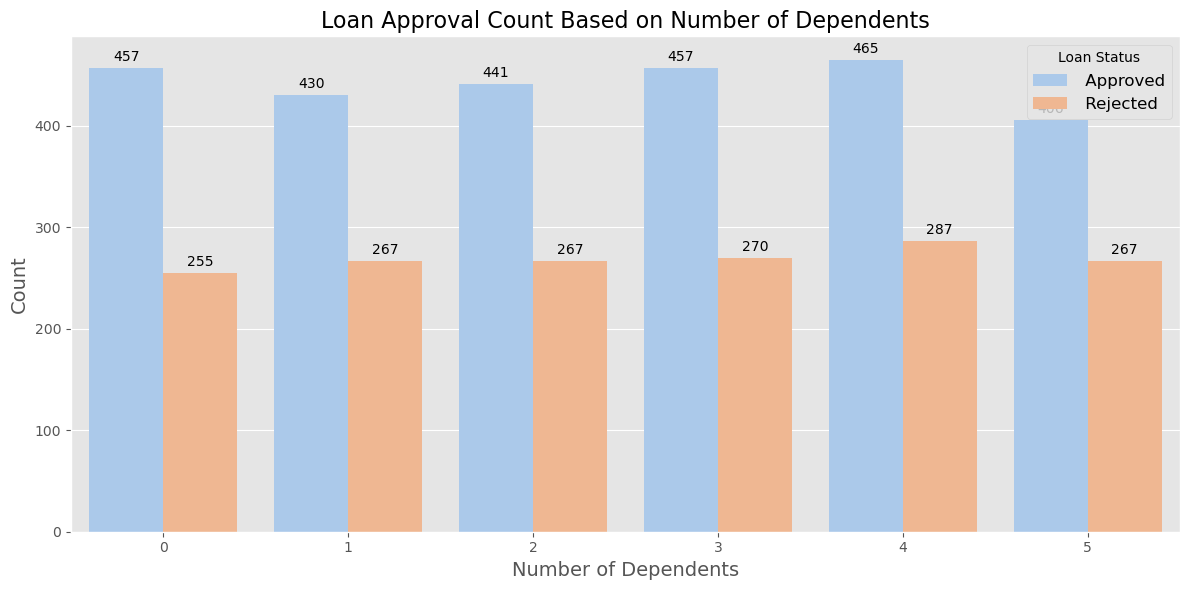

In [18]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a countplot using seaborn with advanced features
sns.countplot(x=' no_of_dependents', data=df, hue=' loan_status', palette='pastel', ax=ax)

# Set title and labels for the plot
ax.set_title('Loan Approval Count Based on Number of Dependents', fontsize=16)
ax.set_xlabel('Number of Dependents', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize legend
ax.legend(title='Loan Status', fontsize=12)

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:
The hypothesis concerning loan approval based on the number of dependents yields mixed results upon closer examination. Initially, the hypothesis holds some validity regarding the likelihood of loan rejections, as the count of rejected loans tends to increase with a higher number of dependents. However, the aspect related to loan approvals contradicts the initial hypothesis. Contrary to expectations, the count of approved loans exhibits no significant change with an increase in the number of dependents. Consequently, the hypothesis regarding loan approval based on the number of dependents does not align with the observed data patterns.

## Education Vs Loan Status

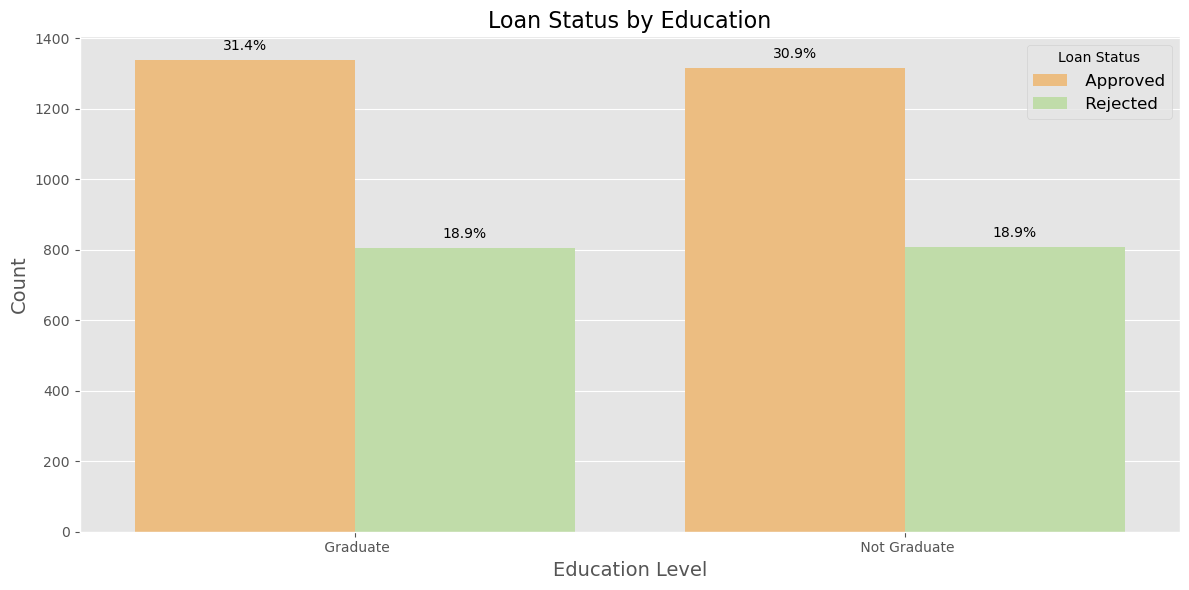

In [19]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a countplot using seaborn with advanced features
sns.countplot(x=' education', hue=' loan_status', data=df, palette='Spectral', ax=ax)

# Set title and labels for the plot
ax.set_title('Loan Status by Education', fontsize=16)
ax.set_xlabel('Education Level', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add percentage annotations for each bar
total_height = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format((p.get_height() / total_height) * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize legend
ax.legend(title='Loan Status', fontsize=12)

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:
The hypothesis asserting that education is not a decisive factor in loan approval aligns with the observed data. The graph illustrates only a marginal difference in the count of loan approvals and rejections between graduate and non-graduate applicants. This difference is not substantial enough to establish education as a discerning factor in the loan approval process.

## Annual Income vs Loan Status

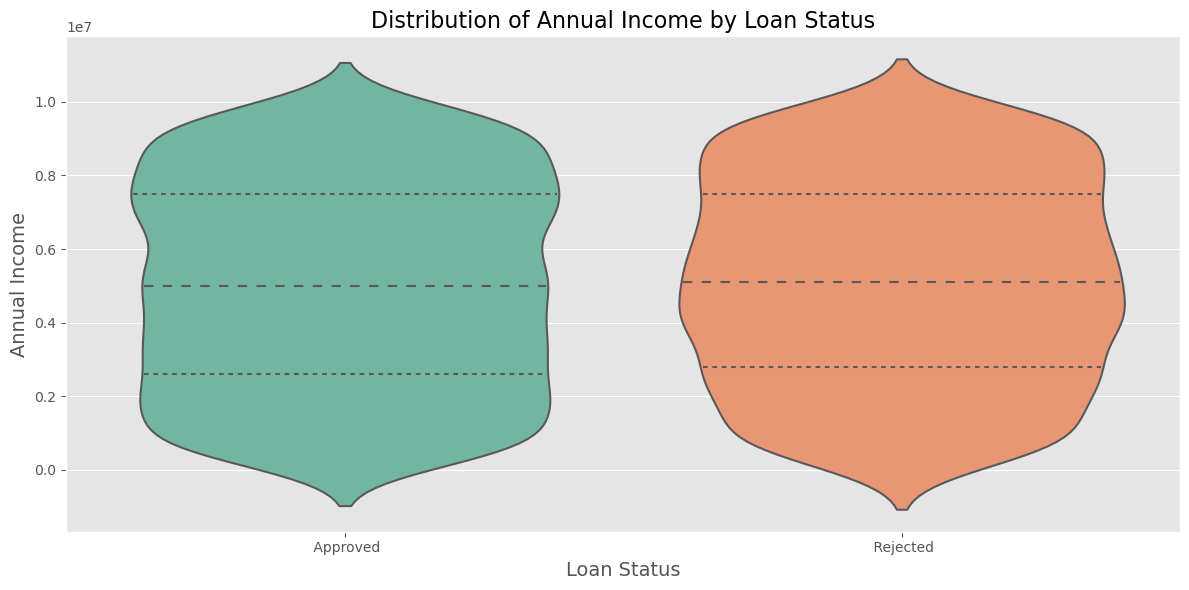

In [20]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a violin plot using seaborn with advanced features
sns.violinplot(x=' loan_status', y=' income_annum', data=df, palette='Set2',inner='quartile')  

# Set title and labels for the plot
ax.set_title('Distribution of Annual Income by Loan Status', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Annual Income', fontsize=14)

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:
In the overall analysis, there appears to be no substantial disparity in the annual incomes between applicants with approved and rejected loans. However, a discernible trend emerges, indicating that approved loan applicants generally exhibit higher annual incomes compared to their rejected counterparts. This distinction becomes evident in the violin plot, where a higher density of approved loan applicants is observed in the vicinity of an annual income around 8 million.

## Loan amount & tenure Vs Loan Status

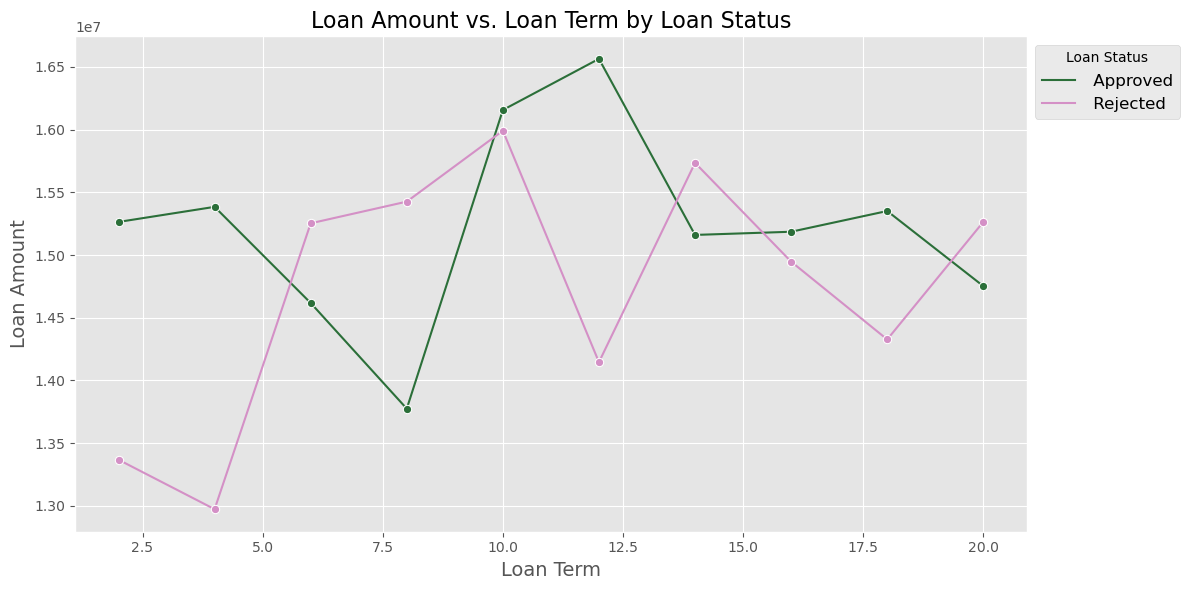

In [21]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line plot using seaborn with advanced features
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status', marker='o', palette='cubehelix',ci=None,ax=ax)

# Set title and labels for the plot
ax.set_title('Loan Amount vs. Loan Term by Loan Status', fontsize=16)
ax.set_xlabel('Loan Term', fontsize=14)
ax.set_ylabel('Loan Amount', fontsize=14)

# Customize legend placement and labels
ax.legend(title='Loan Status', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:
This visualization illustrates the connection between loan amount, loan tenure, and loan status. In a general trend, approved loans exhibit higher amounts coupled with shorter repayment tenures. Conversely, rejected loans tend to have lower amounts and extended repayment tenures. This pattern suggests a potential bank policy of favoring shorter repayment durations for approved loans. Additionally, the bank may be inclined to reject loans with lower amounts, possibly due to considerations of profitability.

## CIBIL Score Vs Loan Status

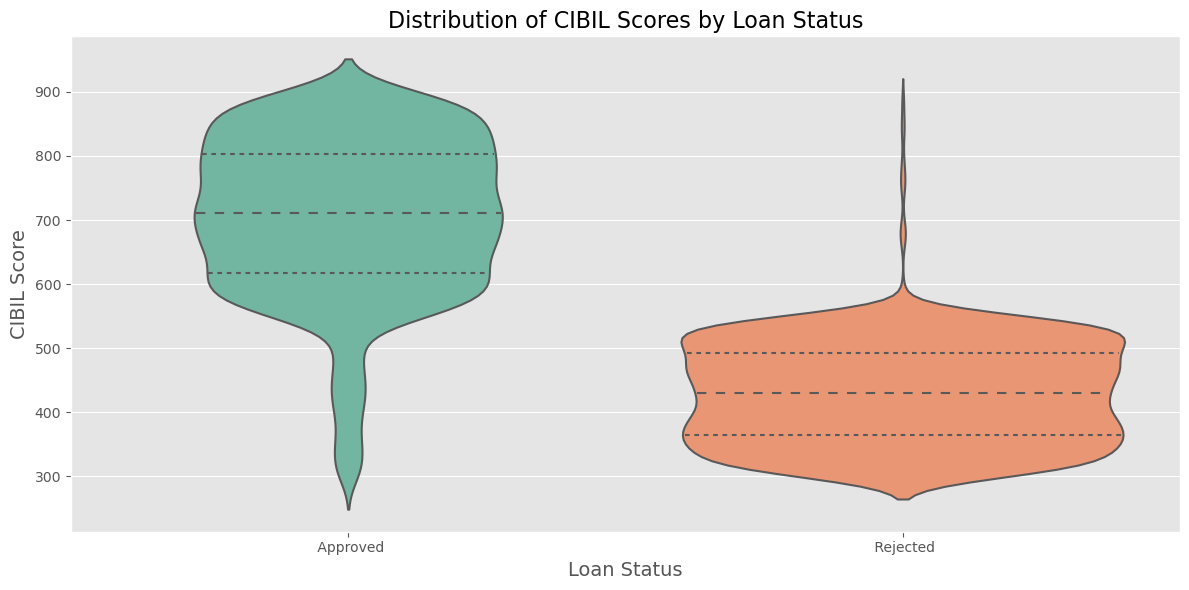

In [22]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a violin plot using seaborn with advanced features
sns.violinplot(x=' loan_status', y=' cibil_score', data=df, palette='Set2',inner='quartile')

# Set title and labels for the plot
ax.set_title('Distribution of CIBIL Scores by Loan Status', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('CIBIL Score', fontsize=14)

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:
The hypothesis concerning the relationship between CIBIL scores and loan approval is unequivocally validated by the observed patterns in the violin plot. Notably, a substantial distribution above 600 CIBIL scores is evident within the loan-approved category. In contrast, the distribution in the not-approved category is more dispersed, encompassing CIBIL scores predominantly below 550. This reaffirms the assumption that a considerable proportion of applicants possess poor or fair CIBIL scores, impacting their likelihood of loan approval. Consequently, a higher CIBIL score, particularly exceeding 600, emerges as a key factor associated with increased chances of loan approval.

## Assets Vs Loan Status

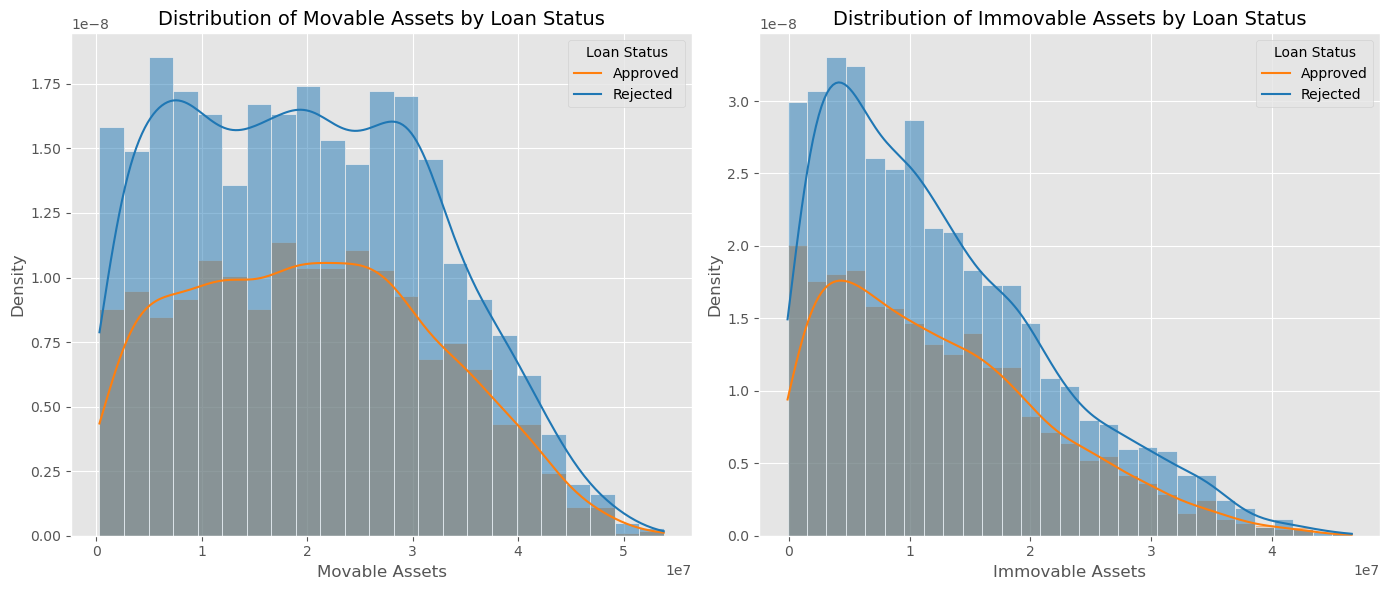

In [23]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Create distribution plots using seaborn with advanced features
sns.histplot(x='Movable_assets', data=df, hue=' loan_status', palette='tab10', stat='density',kde=True, ax=ax[0])
sns.histplot(x='Immovable_assets', data=df, hue=' loan_status', palette='tab10',  stat='density',kde=True, ax=ax[1])

# Set titles and labels for the plots
ax[0].set_title('Distribution of Movable Assets by Loan Status', fontsize=14)
ax[0].set_xlabel('Movable Assets', fontsize=12)
ax[0].set_ylabel('Density', fontsize=12)

ax[1].set_title('Distribution of Immovable Assets by Loan Status', fontsize=14)
ax[1].set_xlabel('Immovable Assets', fontsize=12)
ax[1].set_ylabel('Density', fontsize=12)

# Customize legend
ax[0].legend(title='Loan Status', labels=['Approved', 'Rejected'], fontsize=10)
ax[1].legend(title='Loan Status', labels=['Approved', 'Rejected'], fontsize=10)

# Customize layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


### Interpretation:
Assets serve as collateral, offering a level of security to the bank when issuing loans. The following two visualizations depict the correlation between movable and immovable assets in conjunction with loan status. Both graphs illustrate a trend wherein an increase in assets corresponds to a higher likelihood of loan approval and a reduced probability of rejection. Additionally, the visualizations highlight that the quantity of movable assets tends to exceed that of immovable assets.

## Data Processing 

### Label Encoding the categorical variables

In [24]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [25]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


## Coorelation Matrix Heatmap

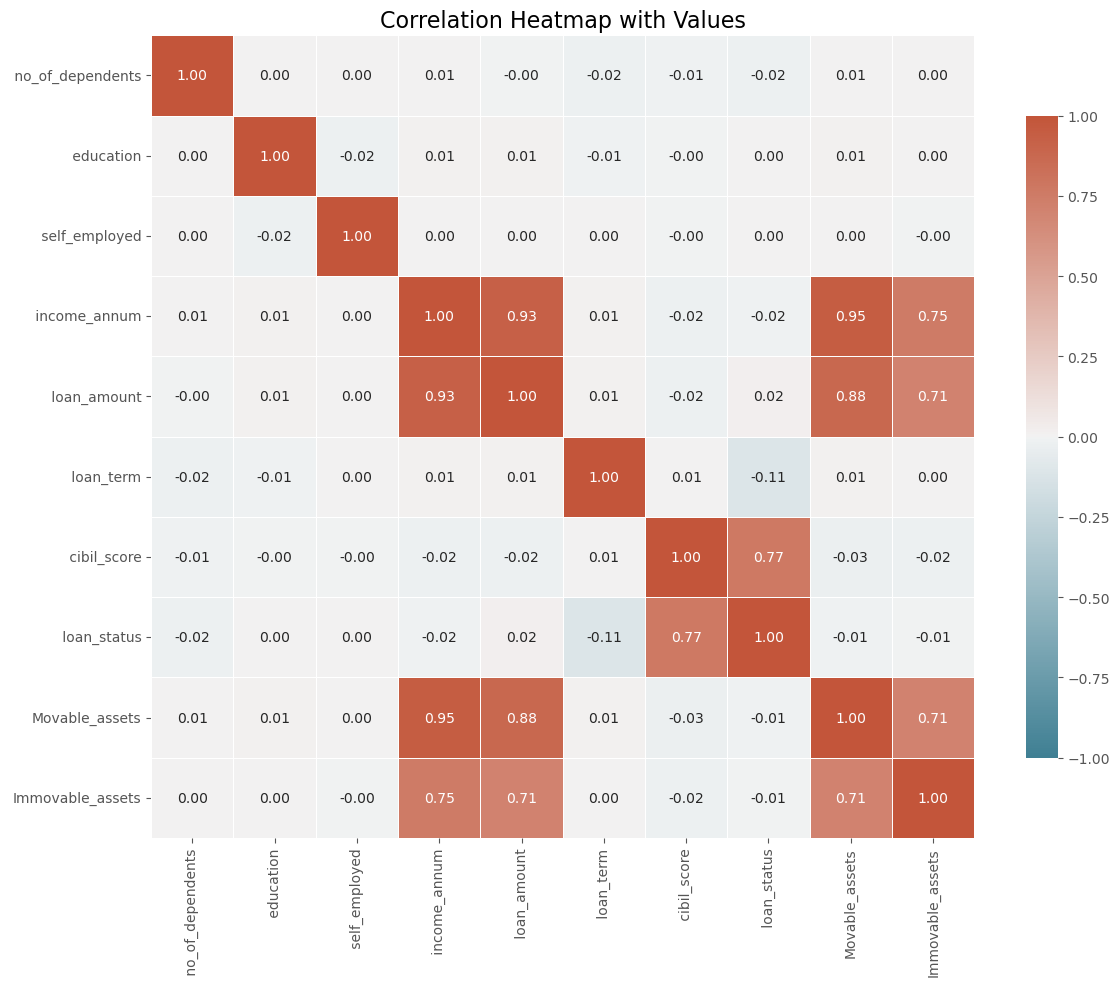

In [26]:
# Set up a diverging color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a figure with a specified size
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn with advanced features
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, linewidths=.5, cbar_kws={"shrink": 0.8})

# Set title for the plot
plt.title('Correlation Heatmap with Values', fontsize=16)

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()



The correlation matrix heatmap reveals several robust correlations within the dataset:

1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

The strong correlation between movable and immovable assets is logical, given that both fall under the category of assets, implying that individuals with higher movable assets are likely to possess more immovable assets, and vice versa. Similarly, the positive correlations between income and both movable and immovable assets align with the expectation that individuals with higher incomes tend to accumulate more assets.

Further exploration of the relationships between assets and loan amounts, as well as between income and loan amounts, will provide additional insights into the dynamics of the data. Additionally, the previous section has already delved into the correlation between loan status and CIBIL score.

## Assets Vs Loan Amount

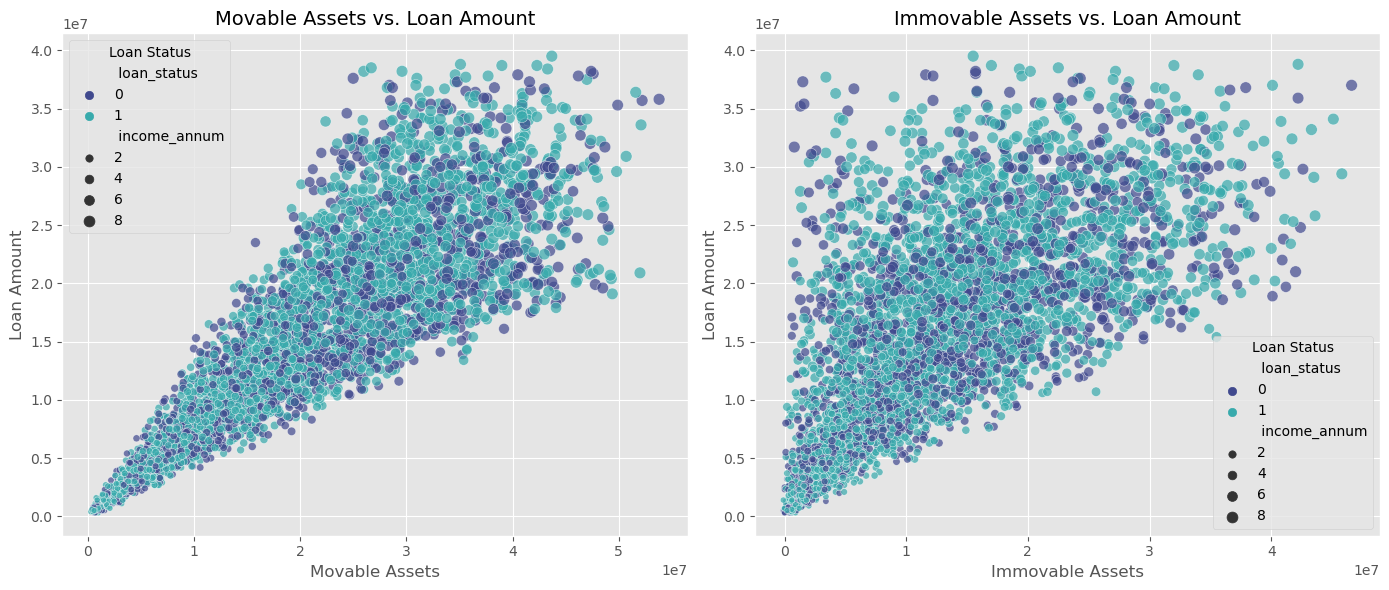

In [27]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Create scatter plots using seaborn with advanced features
sns.scatterplot(x='Movable_assets', y=' loan_amount', hue=' loan_status', size=' income_annum', data=df, ax=ax[0], palette='mako', alpha=0.7)
sns.scatterplot(x='Immovable_assets', y=' loan_amount', hue=' loan_status', size=' income_annum', data=df, ax=ax[1], palette='mako', alpha=0.7)

# Set titles and labels for the plots
ax[0].set_title('Movable Assets vs. Loan Amount', fontsize=14)
ax[0].set_xlabel('Movable Assets', fontsize=12)
ax[0].set_ylabel('Loan Amount', fontsize=12)

ax[1].set_title('Immovable Assets vs. Loan Amount', fontsize=14)
ax[1].set_xlabel('Immovable Assets', fontsize=12)
ax[1].set_ylabel('Loan Amount', fontsize=12)

# Customize legend
ax[0].legend(title='Loan Status', fontsize=10)
ax[1].legend(title='Loan Status', fontsize=10)

# Customize layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


### Interpretation:
The loan amount has a positive relation with movable and immovable assets. The more the
assets, the more the loan amount issued by the bank.

## Loan Amount Vs Income

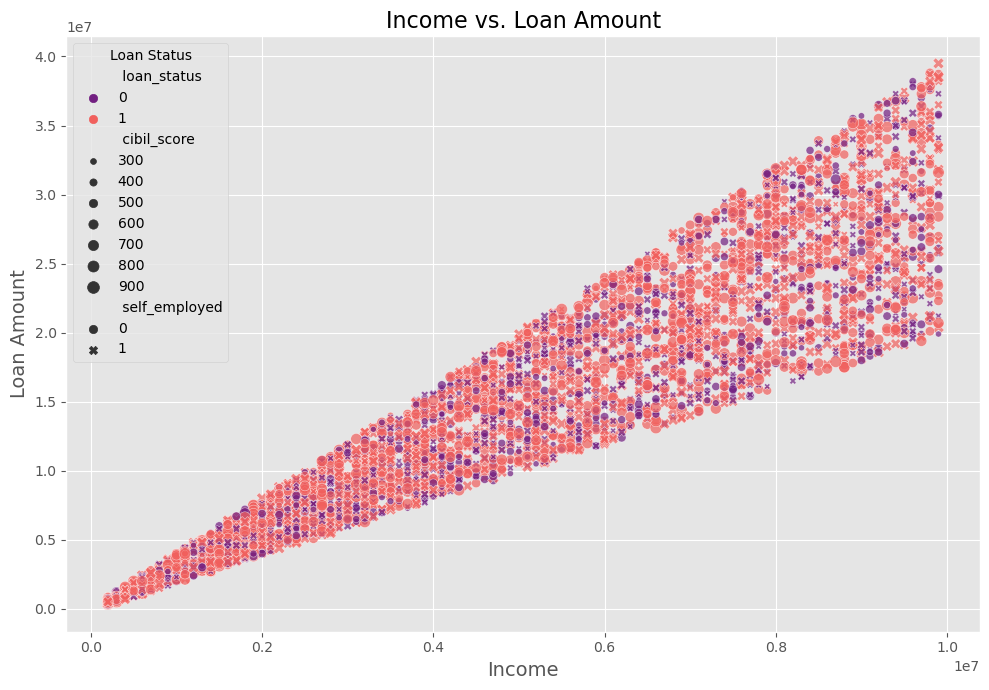

In [28]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(10, 7))

# Create a scatter plot using seaborn with advanced features
sns.scatterplot(x=' income_annum', y=' loan_amount', hue=' loan_status', size=' cibil_score', style=' self_employed', data=df, palette='magma', alpha=0.7)

# Set title and labels for the plot
ax.set_title('Income vs. Loan Amount', fontsize=16)
ax.set_xlabel('Income', fontsize=14)
ax.set_ylabel('Loan Amount', fontsize=14)

# Add a legend
ax.legend(title='Loan Status')

# Customize layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


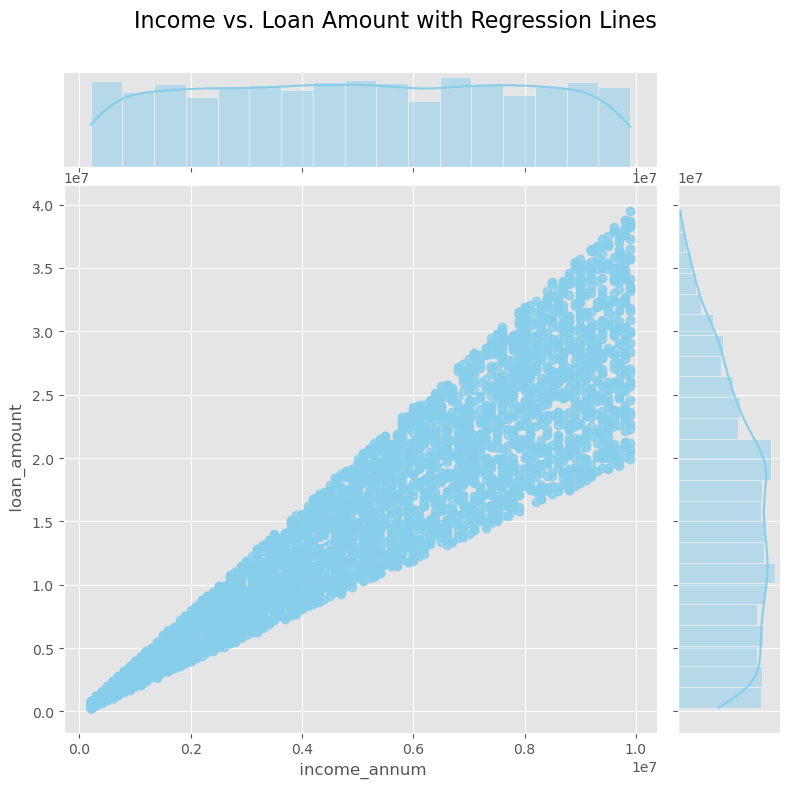

In [29]:
# Create a jointplot with regression lines
sns.jointplot(x=' income_annum', y=' loan_amount', data=df, kind='reg', color='skyblue', height=8)

# Set title for the plot
plt.subplots_adjust(top=0.9)
plt.suptitle('Income vs. Loan Amount with Regression Lines', fontsize=16)

# Show the plot
plt.show()


### Interpretation:
There exists a strong correlation between the loan amount and the annual income of the applicant. As the applicant's income increases, the loan amount also tends to increase. This correlation is directly proportional, indicating that the applicant's income plays a pivotal role in determining the required loan amount.

In [30]:
X= df.loc[:, df.columns!= ' loan_status']
y=df[' loan_status']

In [31]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,30700000,20000000
1,0,0,1,4100000,12200000,8,417,12100000,4900000
2,3,1,0,9100000,29700000,20,506,46100000,11600000
3,3,1,0,8200000,30700000,8,467,31200000,21500000
4,5,0,1,9800000,24200000,20,382,34400000,20600000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,4100000,3300000
4265,0,0,1,3300000,11300000,20,559,12900000,7100000
4266,2,0,0,6500000,23900000,18,457,25400000,13600000
4267,1,0,0,4100000,12800000,8,780,19900000,8900000


In [32]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name:  loan_status, Length: 4269, dtype: int64

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Model Building

I will be using the following machine learning models to predict the loan approval status:
1. Logistic Regression Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Naive Bayes Classifier 
6. KNN

### Logistics Regression Classifier

In [34]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)
y_log=classifier.predict(X_test)
y_log

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
y_test

1972    1
528     1
3540    1
87      0
1621    0
       ..
3559    1
4149    1
3387    1
3649    1
2355    0
Name:  loan_status, Length: 1281, dtype: int64

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_log))

[[  1 505]
 [  0 775]]


In [37]:
print('for testing', accuracy_score(y_test, y_log))
print('for training', accuracy_score(y_train, classifier.predict(X_train)))

for testing 0.6057767369242779
for training 0.6298527443105756


In [38]:
print(classification_report(y_test,y_log))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       506
           1       0.61      1.00      0.75       775

    accuracy                           0.61      1281
   macro avg       0.80      0.50      0.38      1281
weighted avg       0.76      0.61      0.46      1281



### SVM Classifier

In [39]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='rbf')            # three types of kernel-rbf,sigmoid,poly
svc_classifier.fit(X_train, y_train)
y_svc=svc_classifier.predict(X_test)
y_svc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
y_test

1972    1
528     1
3540    1
87      0
1621    0
       ..
3559    1
4149    1
3387    1
3649    1
2355    0
Name:  loan_status, Length: 1281, dtype: int64

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_svc,y_test)

0.6049960967993755

In [42]:
print(confusion_matrix(y_svc,y_test))

[[  0   0]
 [506 775]]


In [43]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.60      1.00      0.75       775

    accuracy                           0.60      1281
   macro avg       0.30      0.50      0.38      1281
weighted avg       0.37      0.60      0.46      1281



In [44]:
print('for testing', accuracy_score(y_test, y_svc))
print('for training', accuracy_score(y_train, svc_classifier.predict(X_train)))

for testing 0.6049960967993755
for training 0.6295180722891566


### Dtree Classifier

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 0.87744142, -1.01144433,  1.00335234, ..., -0.28084209,
        -1.22554002, -0.9533759 ],
       [-0.8964388 , -1.01144433, -0.99665886, ..., -1.68891011,
        -0.74288704, -0.00604934],
       [ 0.87744142, -1.01144433,  1.00335234, ..., -0.71722681,
         1.28086845,  0.89772198],
       ...,
       [ 0.28614801, -1.01144433,  1.00335234, ...,  0.47555808,
         1.06071095,  1.62727232],
       [ 0.87744142, -1.01144433, -0.99665886, ...,  1.0690413 ,
         0.62886354, -1.06226402],
       [-0.8964388 , -1.01144433,  1.00335234, ...,  0.63265658,
        -0.08241454,  0.14639402]])

In [46]:
X_test=sc.fit_transform(X_test)
X_test

array([[-0.85502728,  1.01177897,  0.96848994, ...,  0.45233132,
         1.08981815,  1.80043386],
       [-0.26868363,  1.01177897,  0.96848994, ..., -0.20454115,
         0.72825426,  0.45093619],
       [-0.85502728,  1.01177897, -1.03253525, ..., -0.25063746,
         0.59371886, -0.84500998],
       ...,
       [ 1.49034734,  1.01177897,  0.96848994, ...,  1.03429728,
        -1.56725604, -1.24129104],
       [ 0.90400368, -0.98835816,  0.96848994, ..., -0.03167997,
        -0.95343827, -0.19168174],
       [ 0.31766003, -0.98835816,  0.96848994, ..., -0.26792358,
        -0.20508509,  0.19388902]])

In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_dtree=classifier.predict(X_test)
y_dtree

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
y_test

1972    1
528     1
3540    1
87      0
1621    0
       ..
3559    1
4149    1
3387    1
3649    1
2355    0
Name:  loan_status, Length: 1281, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_dtree)

array([[467,  39],
       [ 13, 762]], dtype=int64)

In [51]:
print(classification_report(y_test,y_dtree))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       506
           1       0.95      0.98      0.97       775

    accuracy                           0.96      1281
   macro avg       0.96      0.95      0.96      1281
weighted avg       0.96      0.96      0.96      1281



In [52]:
print('for testing', accuracy_score(y_test, y_dtree))
print('for training', accuracy_score(y_train, classifier.predict(X_train)))

for testing 0.9594067135050741
for training 1.0


In [53]:
parameters={
    'criterion':["gini","entropy"],
    'splitter':["best","random"],
    'max_depth':[1,2,3,4,5,6,7,8],
    'max_features':["auto","sqrt","log2"]
}

In [54]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(classifier,param_grid=parameters,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [56]:
cv.best_score_

0.9645277670403299

In [57]:
modified_classifier=DecisionTreeClassifier(criterion='entropy', max_depth= 5, max_features= 'auto',splitter='best')
modified_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')

In [58]:
modified_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto')

In [59]:
y_train_pred=modified_classifier.predict(X_train)
y_test_pred=modified_classifier.predict(X_test)

In [60]:
accuracy_score(y_train,y_train_pred)

0.964190093708166

In [61]:
accuracy_score(y_test,y_test_pred)

0.936768149882904

### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_forest = forest.predict(X_test)
y_forest

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
np.array(y_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [65]:
print(confusion_matrix(y_forest,y_test))

[[465   6]
 [ 41 769]]


In [66]:
print(classification_report(y_forest,y_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       471
           1       0.99      0.95      0.97       810

    accuracy                           0.96      1281
   macro avg       0.96      0.97      0.96      1281
weighted avg       0.97      0.96      0.96      1281



In [67]:
print('for testing', accuracy_score(y_test, y_forest))
print('for training', accuracy_score(y_train, forest.predict(X_train)))

for testing 0.9633099141295862
for training 1.0


## Naive Bayes Classifier 

In [68]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)

y_pred_naive = naive.predict(X_test)
y_pred_naive

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [69]:
print(confusion_matrix(y_test,y_pred_naive))

[[442  64]
 [ 39 736]]


In [70]:
print('for testing', accuracy_score(y_test, y_pred_naive))
print('for training', accuracy_score(y_train, naive.predict(X_train)))

for testing 0.9195940671350508
for training 0.9323962516733602


## KNN Classifier

In [71]:
from sklearn import neighbors
Classifier = neighbors.KNeighborsClassifier()
Classifier.fit(X_train,y_train)
y_knn = Classifier.predict(X_test)
y_knn

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
y_test

1972    1
528     1
3540    1
87      0
1621    0
       ..
3559    1
4149    1
3387    1
3649    1
2355    0
Name:  loan_status, Length: 1281, dtype: int64

In [73]:
print(confusion_matrix(y_knn,y_test))

[[434  49]
 [ 72 726]]


In [74]:
print('for testing', accuracy_score(y_test, y_knn))
print('for training', accuracy_score(y_train, Classifier.predict(X_train)))

for testing 0.9055425448868072
for training 0.9464524765729585


## Model Evalution

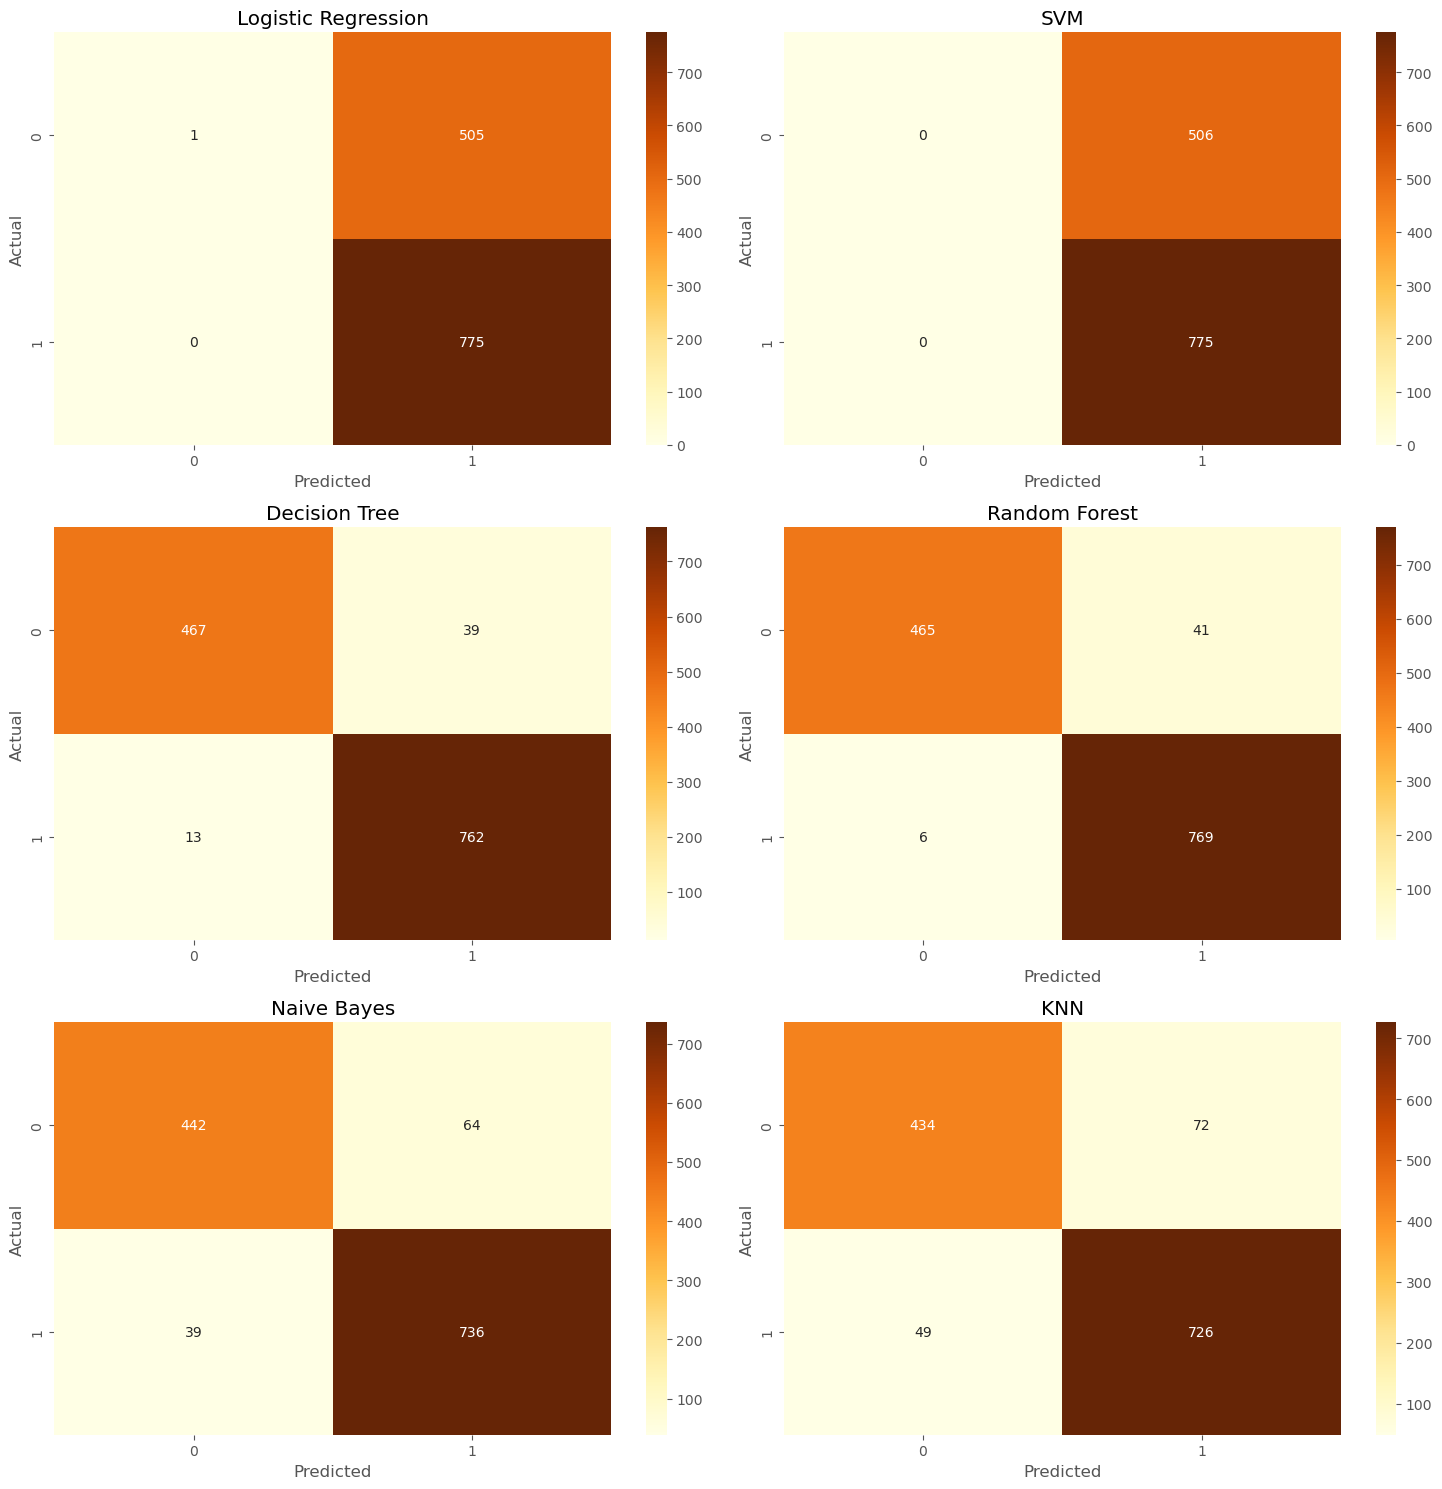

In [75]:
from sklearn.metrics import confusion_matrix

# Assuming you have the predictions and true labels for each model
models = {'Logistic Regression': y_log, 'SVM': y_svc,'Decision Tree': y_dtree, 'Random Forest': y_forest, 'Naive Bayes': y_pred_naive, 'KNN': y_knn}

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, (model_name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, ax=axes[i // 2, i % 2], cmap='YlOrBr', fmt='g')
    axes[i // 2, i % 2].set_title(model_name)
    axes[i // 2, i % 2].set_xlabel('Predicted')
    axes[i // 2, i % 2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


The presented confusion matrix heatmap provides insights into the distribution of true positive and true negative values across various machine learning models. In the logistic regression classifier and support vector classifier, there are 505 instances of false positives and false negatives combined. On the other hand, the decision tree classifier and random forest classifier exhibit superior performance with only 49 occurrences of false positives and false negatives. The Naive Bayes classifier shows 103 instances of false positives and false negatives, while the KNN classifier demonstrates 121 such occurrences. In terms of accuracy, the decision tree classifier and random forest classifier outperform the other models.


## Distribution Plot

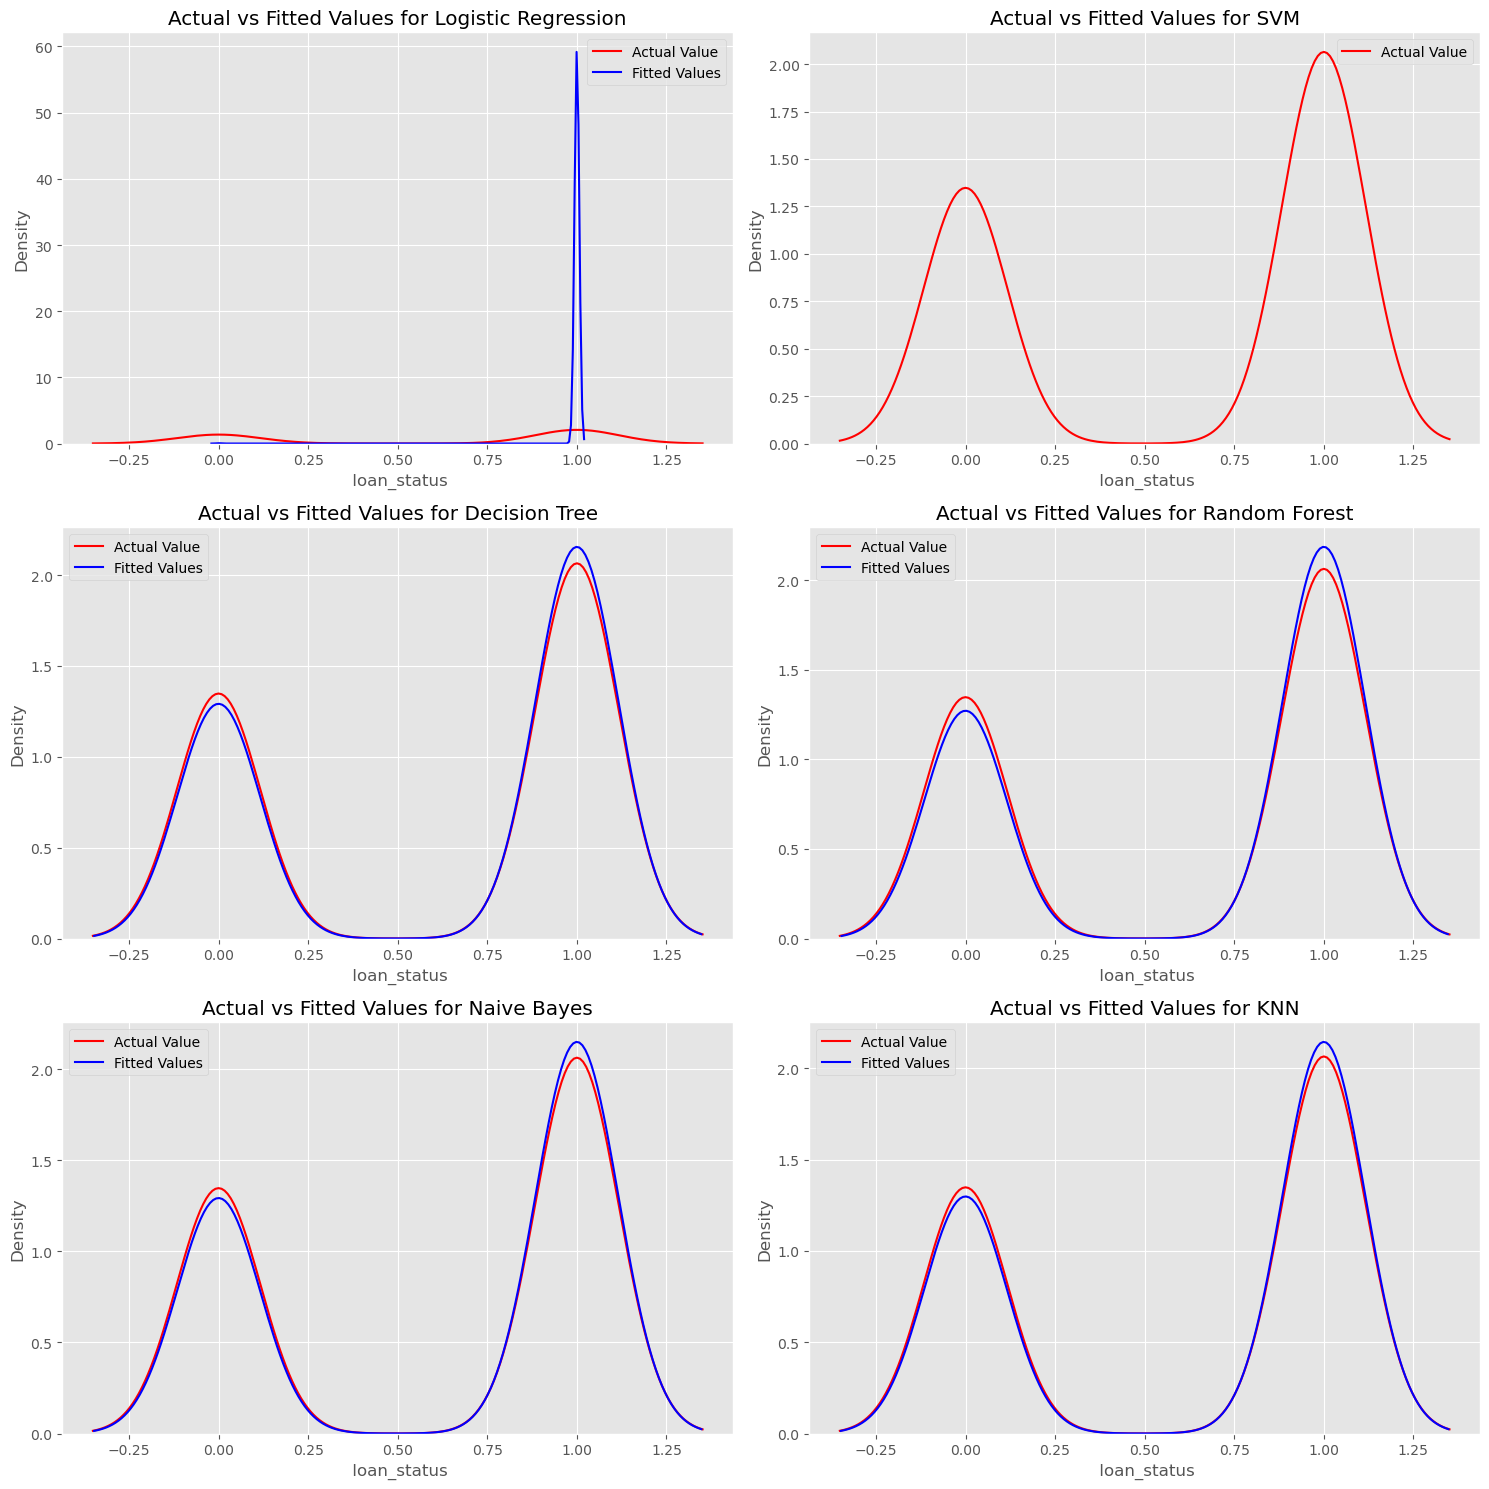

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the predictions and true labels for each model
models = {'Logistic Regression': y_log, 'SVM': y_svc,'Decision Tree': y_dtree, 'Random Forest': y_forest, 'Naive Bayes': y_pred_naive, 'KNN': y_knn}

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, (model_name, y_pred) in enumerate(models.items()):
    sns.distplot(y_test, hist=False, color="r", label="Actual Value", ax=axes[i // 2, i % 2])
    sns.distplot(y_pred, hist=False, color="b", label="Fitted Values", ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Actual vs Fitted Values for {model_name}')
    axes[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()


The distribution plots for all models reveal comparable patterns, indicating similar distributions of predicted and actual values across different machine learning models. However, distinct differences are observed in the distribution density for Logistic Regression and SVM compared to the other models. These variations suggest unique characteristics in the prediction patterns of these two models.

## Classification Report

In [77]:
from sklearn.metrics import classification_report

# Assuming y_dtree, y_forest, y_log, y_svm, y_pred_naive, y_knn are your predicted labels
# and y_test is the true labels

models = {'Logistic Regression': y_log,'SVM': y_svc,'Decision Tree': y_dtree, 'Random Forest': y_forest, 
         'Naive Bayes': y_pred_naive, 'KNN': y_knn}

for model_name, y_pred in models.items():
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       506
           1       0.61      1.00      0.75       775

    accuracy                           0.61      1281
   macro avg       0.80      0.50      0.38      1281
weighted avg       0.76      0.61      0.46      1281


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.60      1.00      0.75       775

    accuracy                           0.60      1281
   macro avg       0.30      0.50      0.38      1281
weighted avg       0.37      0.60      0.46      1281


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       506
           1       0.95      0.98      0.97       775

    accuracy                           0.96      1281
   mac

In [78]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming dtree_pred, rfc_pred, log_pred, svm_pred, naive_pred, knn_pred are your predicted labels
# and y_test is the true labels

models = {'Logistic Regression': y_log,'SVM': y_svc,'Decision Tree': y_dtree, 'Random Forest': y_forest, 
         'Naive Bayes': y_pred_naive, 'KNN': y_knn}

for model_name, y_pred in models.items():
    print(f"\nPerformance Metrics for {model_name}:")
    print('R2 score: ', r2_score(y_test, y_pred))
    print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
    print('\n')



Performance Metrics for Logistic Regression:
R2 score:  -0.649636618640826
Mean Squared Error:  0.3942232630757221
Mean Absolute Error:  0.3942232630757221



Performance Metrics for SVM:
R2 score:  -0.6529032258064513
Mean Squared Error:  0.3950039032006245
Mean Absolute Error:  0.3950039032006245



Performance Metrics for Decision Tree:
R2 score:  0.8301364273874793
Mean Squared Error:  0.04059328649492584
Mean Absolute Error:  0.04059328649492584



Performance Metrics for Random Forest:
R2 score:  0.8464694632156062
Mean Squared Error:  0.03669008587041374
Mean Absolute Error:  0.03669008587041374



Performance Metrics for Naive Bayes:
R2 score:  0.663539461940584
Mean Squared Error:  0.08040593286494926
Mean Absolute Error:  0.08040593286494926



Performance Metrics for KNN:
R2 score:  0.6047405329593268
Mean Squared Error:  0.09445745511319281
Mean Absolute Error:  0.09445745511319281




From all the above metrics, graphs and reports, I conclude , the decision tree and random forest models outperform others, demonstrating higher accuracy and better fit to the data. Logistic regression and SVM models perform less effectively, showing lower accuracy and higher discrepancies between predicted and actual values. Naive Bayes and KNN models fall in between, demonstrating moderate predictive capabilities.

## Conclusion

Through the exploratory data analysis, several key factors have been identified as significant contributors to the loan approval process:

1. CIBIL Score: Individuals with higher CIBIL scores exhibit a greater likelihood of loan approval.

2. Number of Dependents: The data suggests that having more dependents correlates with a decreased likelihood of loan approval.

3. Assets: Higher asset ownership, encompassing both movable and immovable assets, is associated with an increased chance of loan approval.

4. Loan Amount and Tenure: There is a trend indicating that individuals with higher loan amounts and shorter tenures have higher chances of loan approval.

The Decision Tree Classifier and Random Forest Classifier outperformed other models with an accuracy of 96%, indicating their effectiveness in predicting loan approval status. The transparent decision tree structure and ensemble approach contribute to their success. Logistic Regression, SVM, Naive Bayes, and KNN showed lower accuracies (60% to 92%), suggesting potential limitations in capturing dataset complexities. Further analysis and feature engineering may enhance the performance of these models.